In [10]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in data
The stock data first:

In [30]:
dfs = {}

for ticker in ['BLK', 'GS', 'MS']:
    dfs[ticker] = pd.read_pickle('stock_{}.pickle'.format(ticker)).set_index('Date')

The media data:

In [20]:
df_media = pd.read_csv('MediaAttention_Mini.csv', parse_dates=[0], index_col='Time')

In [21]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2008-01-01 to 2008-12-31
Data columns (total 23 columns):
Morgan_Stanley_count             366 non-null int64
Goldman_Sachs_count              366 non-null int64
BlackRock_count                  366 non-null int64
positive_count                   366 non-null int64
negative_count                   366 non-null int64
Morgan_Stanley_positive_count    366 non-null int64
Morgan_Stanley_negative_count    366 non-null int64
Goldman_Sachs_positive_count     366 non-null int64
Goldman_Sachs_negative_count     366 non-null int64
BlackRock_positive_count         366 non-null int64
BlackRock_negative_count         366 non-null int64
total_msg_count                  366 non-null int64
Morgan_Stanley_frac              366 non-null float64
Goldman_Sachs_frac               366 non-null float64
BlackRock_frac                   366 non-null float64
positive_frac                    366 non-null float64
negative_frac                    366

In [31]:
for ticker in dfs:
    dfs[ticker] = dfs[ticker].merge(df_media, how='inner', left_index=True, right_index=True)

In [33]:
dfs['BLK'].head(10)

,Close,diff_1d,diff_7d,Label,Morgan_Stanley_count,Goldman_Sachs_count,BlackRock_count,positive_count,negative_count,Morgan_Stanley_positive_count,...,Goldman_Sachs_frac,BlackRock_frac,positive_frac,negative_frac,Morgan_Stanley_positive_frac,Morgan_Stanley_negative_frac,Goldman_Sachs_positive_frac,Goldman_Sachs_negative_frac,BlackRock_positive_frac,BlackRock_negative_frac
2008-01-02,215.309998,-0.011625,0.007282,0,28,18,10,379,835,0,...,0.006265,0.003481,0.131918,0.290637,0.000000,0.007658,0.0,0.005569,0.0,0.005569
2008-01-03,225.800003,-0.006873,0.007158,1,34,17,5,422,986,0,...,0.005105,0.001502,0.126727,0.296096,0.000000,0.009009,0.0,0.004204,0.0,0.002102
2008-01-04,210.979996,0.048720,0.006466,0,25,18,5,334,869,0,...,0.006944,0.001929,0.128858,0.335262,0.000000,0.009259,0.0,0.006559,0.0,0.002701
2008-01-07,206.699997,-0.065633,-0.005111,0,32,17,10,549,1178,0,...,0.004308,0.002534,0.139128,0.298530,0.000000,0.007096,0.0,0.003548,0.0,0.003041
2008-01-08,201.130005,-0.020286,-0.009669,0,26,20,8,569,1186,0,...,0.005151,0.002060,0.146536,0.305434,0.000000,0.006181,0.0,0.004378,0.0,0.002318
2008-01-09,199.779999,-0.026947,-0.011106,0,31,24,11,498,1128,0,...,0.006891,0.003158,0.142980,0.323859,0.000000,0.007752,0.0,0.006029,0.0,0.004307
2008-01-10,208.830002,-0.006712,-0.012765,1,25,17,6,484,1101,0,...,0.004660,0.001645,0.132675,0.301809,0.000000,0.005482,0.0,0.003838,0.0,0.002193
2008-01-11,204.059998,0.045300,-0.004633,0,0,0,0,45,109,0,...,0.000000,0.000000,0.151007,0.365772,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2008-01-14,208.399994,-0.022842,-0.006914,1,28,18,7,587,1111,2,...,0.004877,0.001897,0.159035,0.301002,0.000542,0.006773,0.0,0.003793,0.0,0.002709
2008-01-15,202.360001,0.021268,-0.010836,0,28,14,7,542,1295,0,...,0.003551,0.001776,0.137494,0.328513,0.000000,0.006596,0.0,0.003298,0.0,0.002283


# Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, make_scorer
from sklearn.model_selection import  cross_val_score, KFold

In [43]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=314, n_jobs=4)

In [51]:
for ticker in dfs:
    X = dfs[ticker].drop(['Label', 'Close'], axis=1)
    y = dfs[ticker].loc[:,'Label']
    scores = cross_val_score(model, X, y, 
                             scoring=make_scorer(accuracy_score), 
                             cv=KFold(5, shuffle=True, random_state=314), 
                             n_jobs=1
                            )
    print('{} prediction performance in accuracy = {:.3f}+-{:.3f}'.format(ticker,
                                                                          np.mean(scores),
                                                                          np.std(scores)
                                                                         ))

BLK prediction performance in accuracy = 0.546+-0.072
GS prediction performance in accuracy = 0.533+-0.031
MS prediction performance in accuracy = 0.538+-0.045


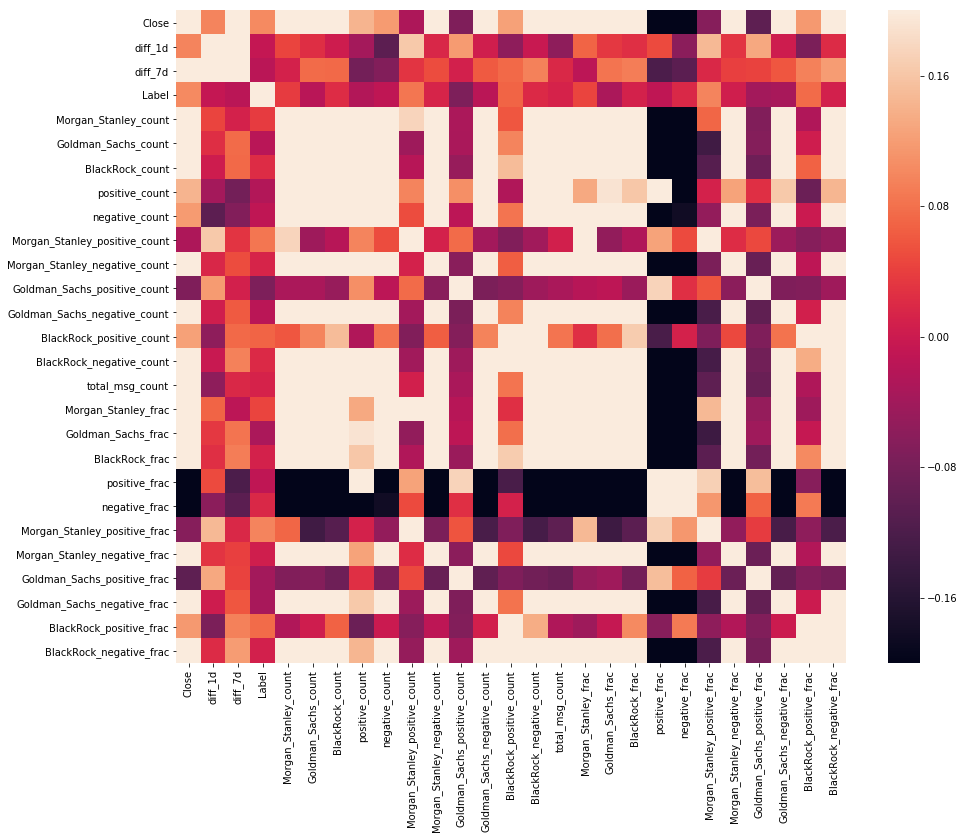

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(dfs['BLK'].corr(), vmin=-0.2, vmax=0.2)